# Common Fourier Pairs

### Lesson Link: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/snsie/bme3508_Spring_2025/blob/main/Module2/common_fourier_pairs.ipynb)


c:\Users\siege\Documents\github\bme3508_spring_2025\.venv\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\siege\Documents\github\bme3508_spring_2025\.venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


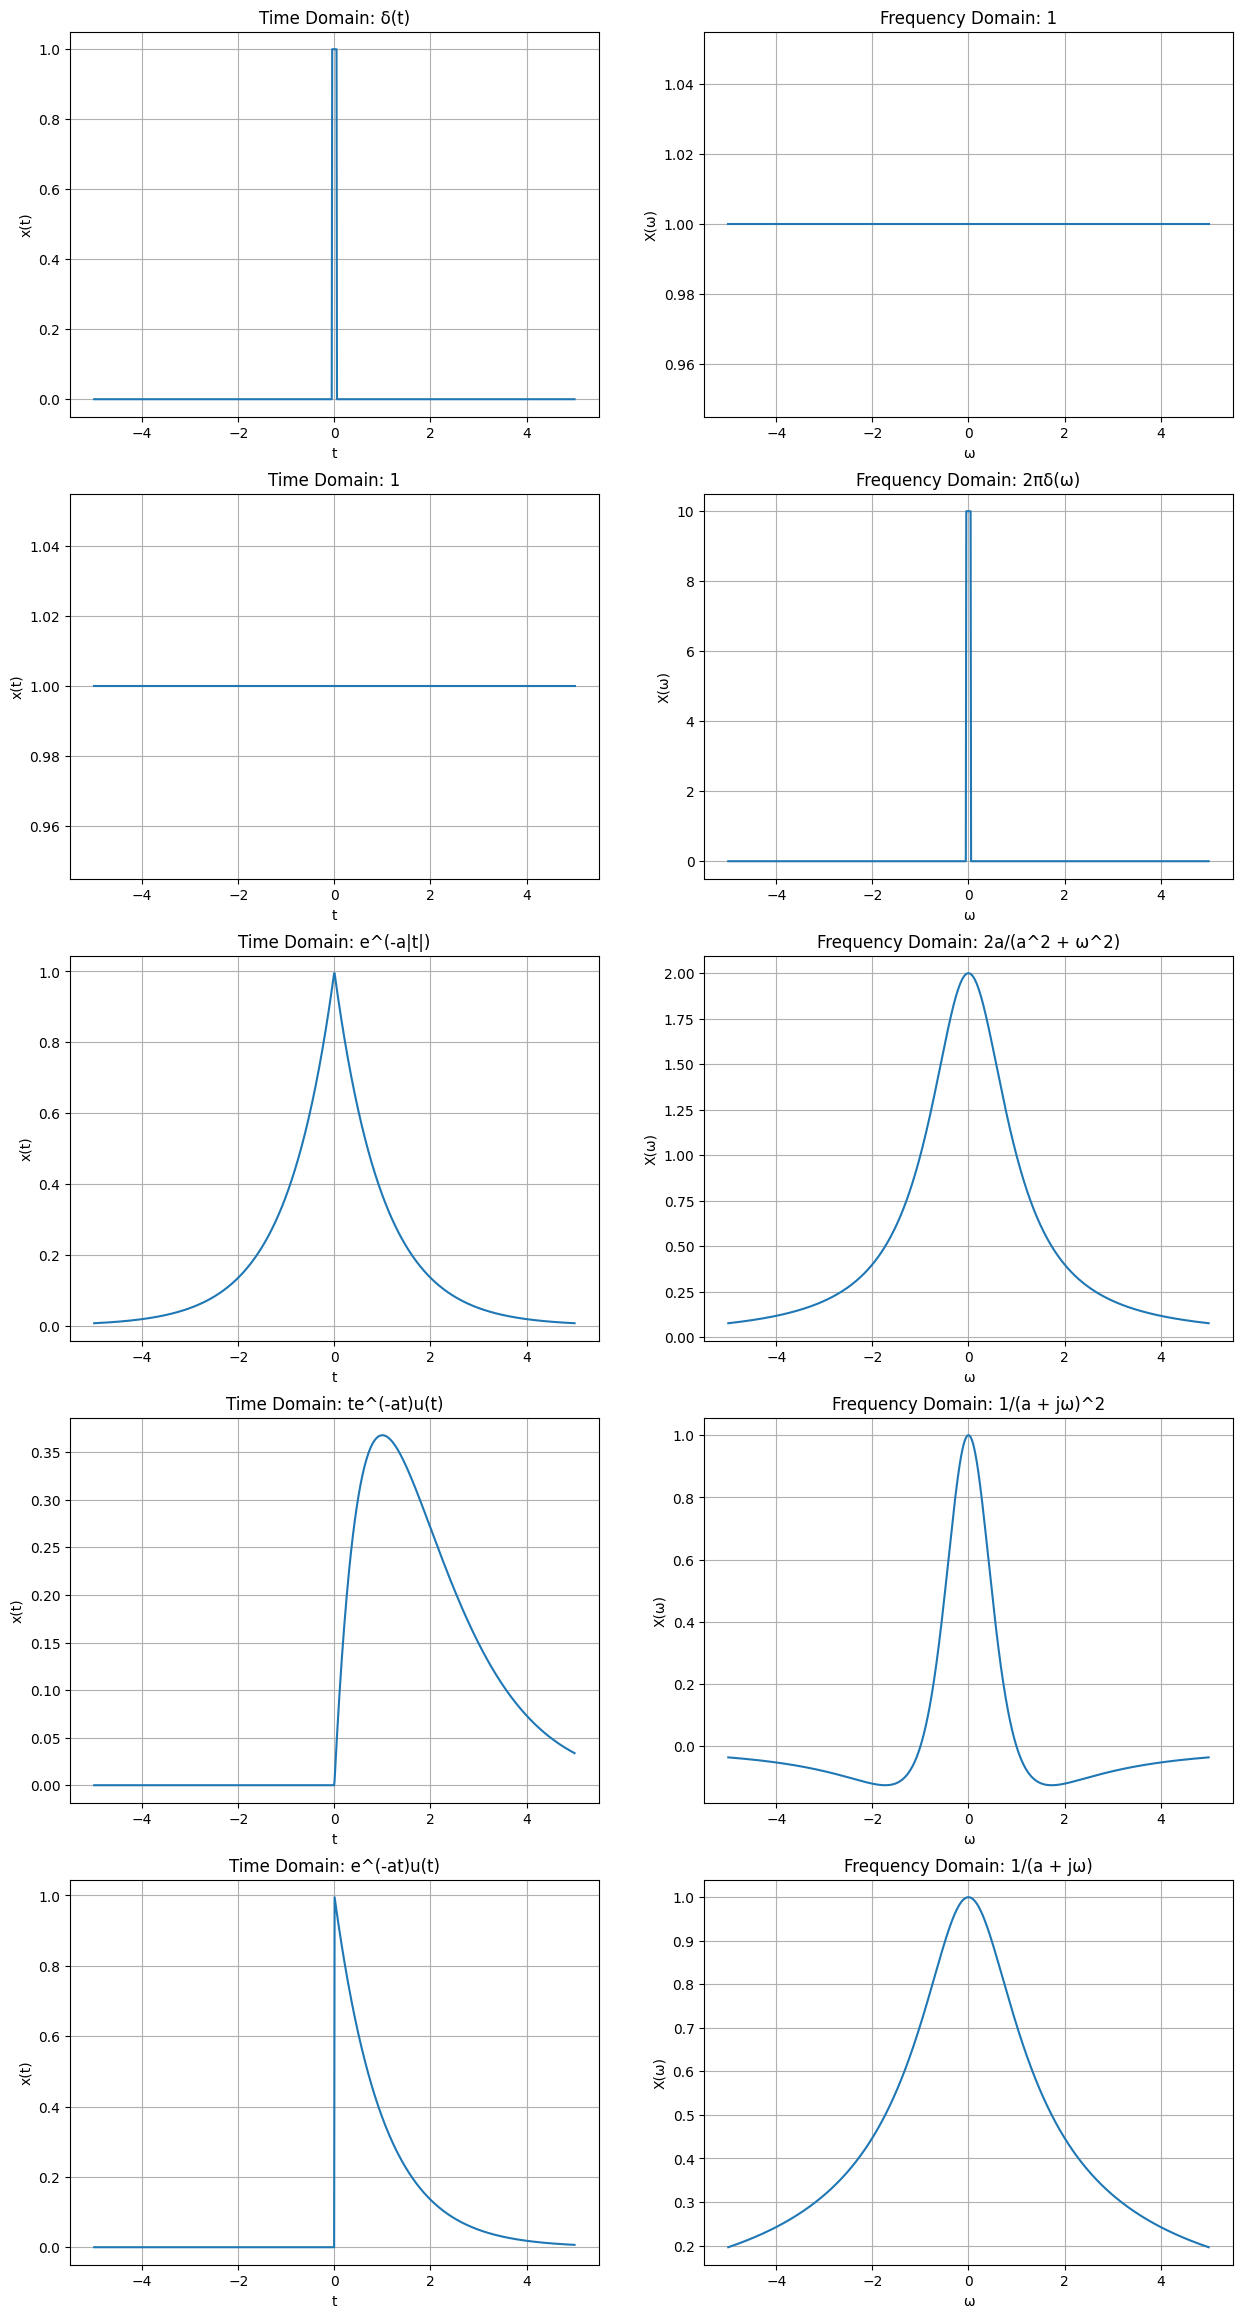

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp
from sympy.abc import t, omega
from sympy import fourier_transform, inverse_fourier_transform, exp, sin, cos, pi, DiracDelta, Heaviside, symbols

# Set up the figure for plotting
plt.figure(figsize=(15,65))

# Function to plot time domain and frequency domain
def plot_fourier_pair(time_func, freq_func, time_expr, freq_expr, idx):
    # Time domain plot
    ax1 = plt.subplot(11, 2, 2*idx-1)
    t_vals = np.linspace(-5, 5, 1000)
    
    if callable(time_func):
        f_t = time_func(t_vals)
    else:
        f_t = time_func
        
    plt.plot(t_vals, f_t)
    plt.title(f"Time Domain: {time_expr}")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.grid(True)
    
    # Frequency domain plot
    ax2 = plt.subplot(11, 2, 2*idx)
    omega_vals = np.linspace(-5, 5, 1000)
    
    if callable(freq_func):
        f_omega = freq_func(omega_vals)
    else:
        f_omega = freq_func
        
    plt.plot(omega_vals, f_omega)
    plt.title(f"Frequency Domain: {freq_expr}")
    plt.xlabel("ω")
    plt.ylabel("X(ω)")
    plt.grid(True)

# 1. δ(t) ↔ 1
plot_fourier_pair(
    lambda t: np.where(np.abs(t) < 0.05, 1, 0),  # Approximation of delta function
    lambda omega: np.ones_like(omega),
    "δ(t)",
    "1",
    1
)

# 2. 1 ↔ 2πδ(ω)
plot_fourier_pair(
    lambda t: np.ones_like(t),
    lambda omega: np.where(np.abs(omega) < 0.05, 10, 0),  # Approximation of 2πδ(ω)
    "1",
    "2πδ(ω)",
    2
)

# 3. e^(-a|t|) ↔ 2a/(a^2 + ω^2)
a = 1
plot_fourier_pair(
    lambda t: np.exp(-a * np.abs(t)),
    lambda omega: 2*a/(a**2 + omega**2),
    "e^(-a|t|)",
    "2a/(a^2 + ω^2)",
    3
)

# 4. te^(-at)u(t) ↔ 1/(a + jω)^2
plot_fourier_pair(
    lambda t: t * np.exp(-a * t) * (t >= 0),
    lambda omega: 1/((a + 1j*omega)**2),  # Using magnitude for plotting
    "te^(-at)u(t)",
    "1/(a + jω)^2",
    4
)

# 5. e^(-at)u(t) ↔ 1/(a + jω)
plot_fourier_pair(
    lambda t: np.exp(-a * t) * (t >= 0),
    lambda omega: 1/np.sqrt((a)**2 + omega**2),  # Magnitude of 1/(a + jω)
    "e^(-at)u(t)",
    "1/(a + jω)",
    5
)



1. Rectangular Pulse


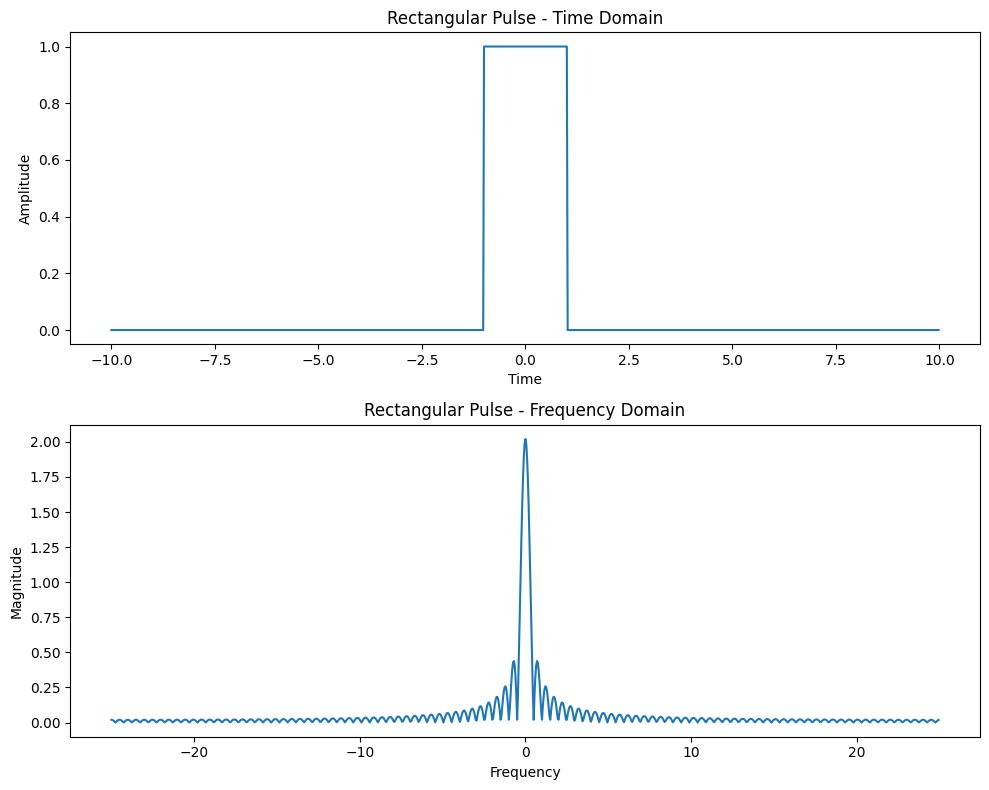


2. Gaussian Function


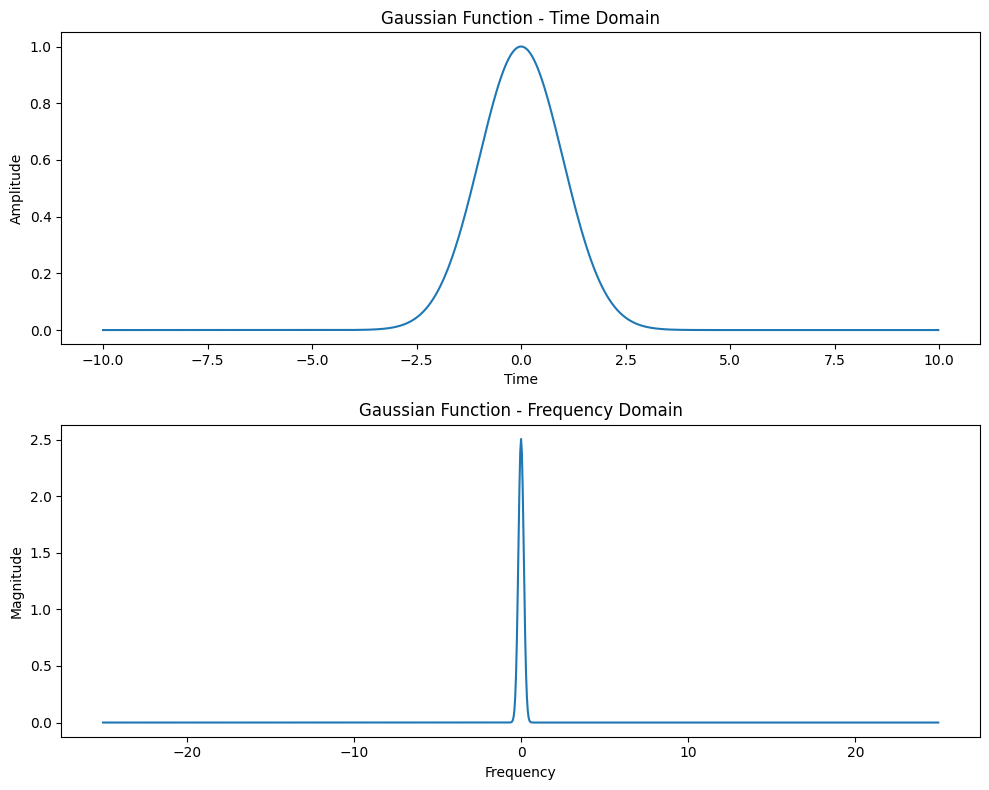


3. Sine Wave


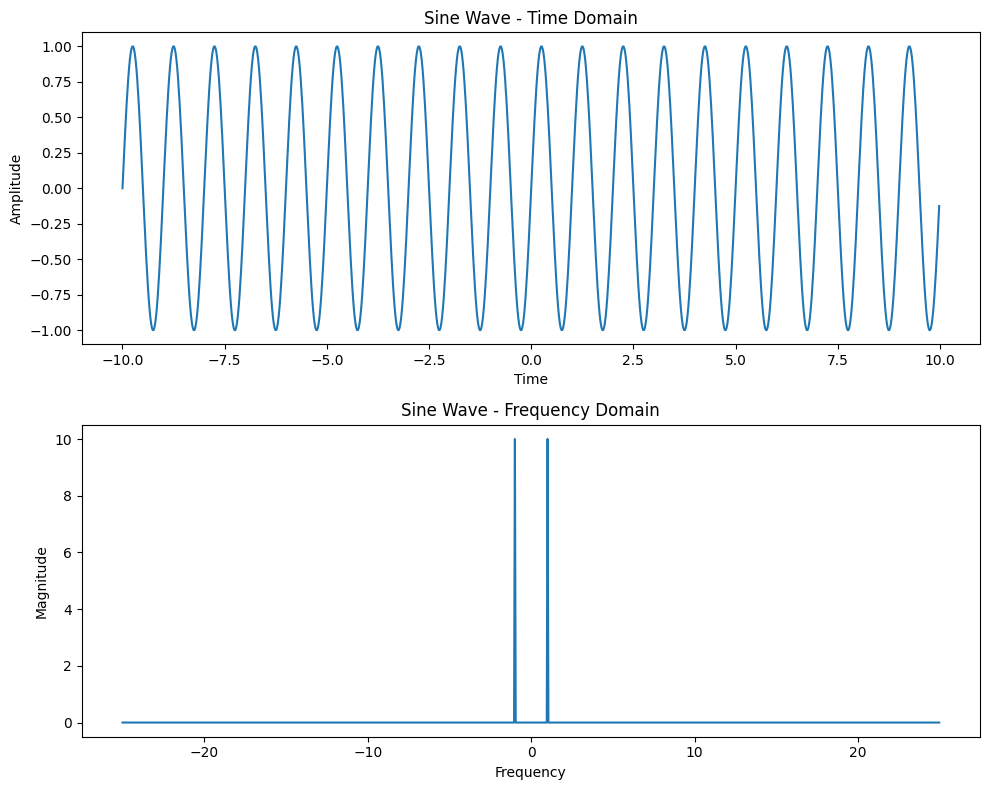


4. Triangular Pulse


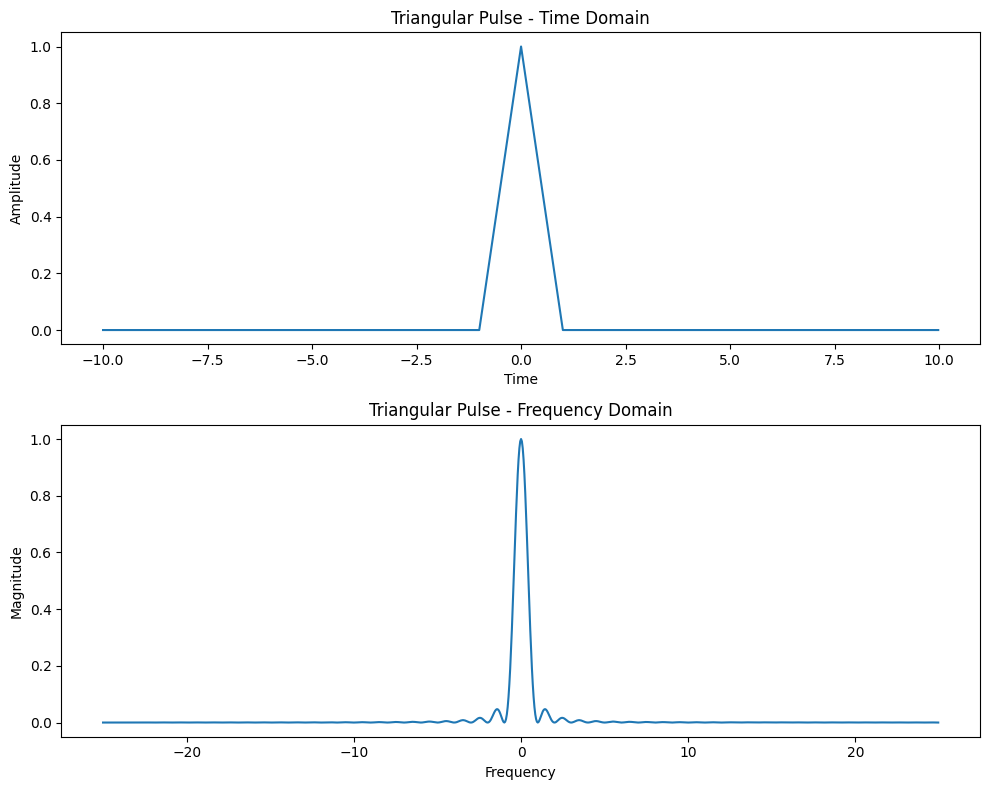


5. Exponential Decay


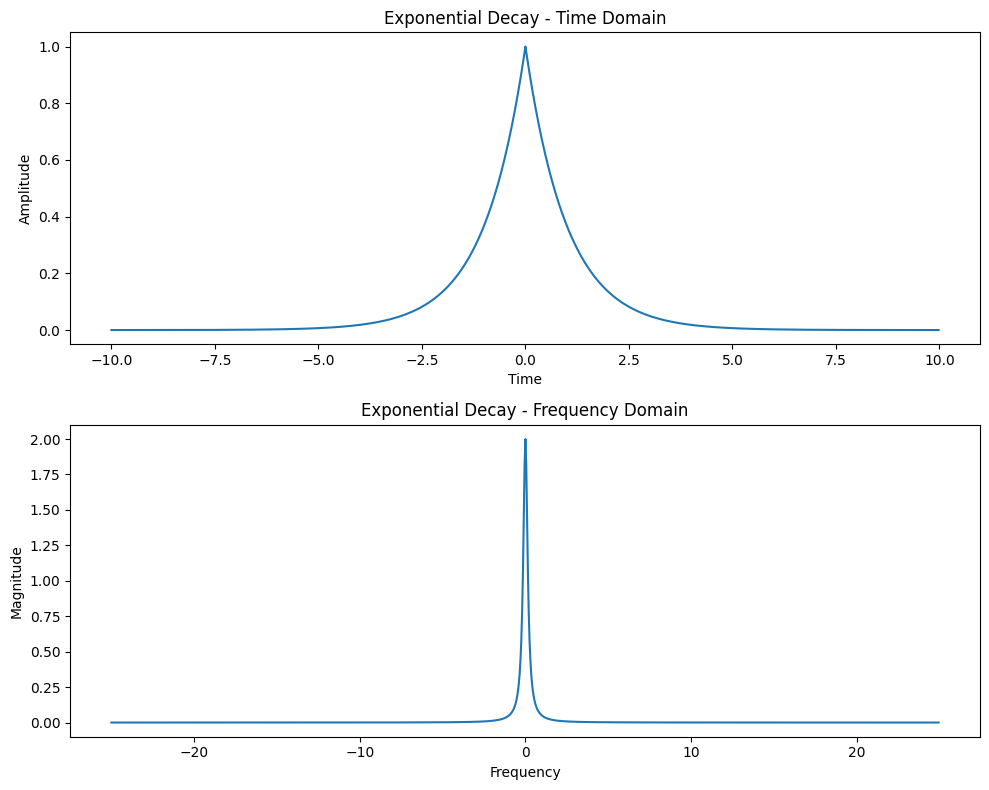

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fourier_pair(t, y, title):
    dt = t[1] - t[0]
    N = len(t)
    
    # Compute the FFT
    fft = np.fft.fft(y)
    freqs = np.fft.fftfreq(N, dt)
    
    # Shift the FFT for better visualization
    fft_shifted = np.fft.fftshift(fft)
    freqs_shifted = np.fft.fftshift(freqs)

    # Correct the magnitude by multiplying by the time step
    magnitude = np.abs(fft_shifted) * dt

    # Plot
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    ax1.plot(t, y)
    ax1.set_title(f'{title} - Time Domain')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')

    ax2.plot(freqs_shifted, magnitude)
    ax2.set_title(f'{title} - Frequency Domain')
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('Magnitude')
    
    plt.tight_layout()
    plt.show()

# Time array
t = np.linspace(-10, 10, 1000, endpoint=False)
dt = t[1] - t[0]

# 1. Rectangular Pulse
print("1. Rectangular Pulse")
y1 = np.where(np.abs(t) <= 1, 1, 0)
plot_fourier_pair(t, y1, "Rectangular Pulse")

# 2. Gaussian Function
print("\n2. Gaussian Function")
y2 = np.exp(-t**2 / 2)
plot_fourier_pair(t, y2, "Gaussian Function")

# 3. Sine Wave
print("\n3. Sine Wave")
y3 = np.sin(2 * np.pi * t)
plot_fourier_pair(t, y3, "Sine Wave")

# 4. Triangular Pulse
print("\n4. Triangular Pulse")
y4 = np.where(np.abs(t) <= 1, 1 - np.abs(t), 0)
plot_fourier_pair(t, y4, "Triangular Pulse")

# 5. Exponential Decay
print("\n5. Exponential Decay")
y5 = np.exp(-np.abs(t))
plot_fourier_pair(t, y5, "Exponential Decay")

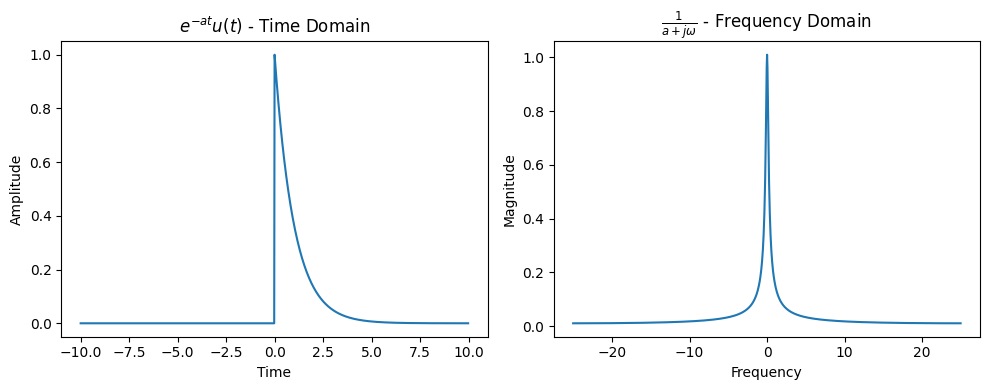

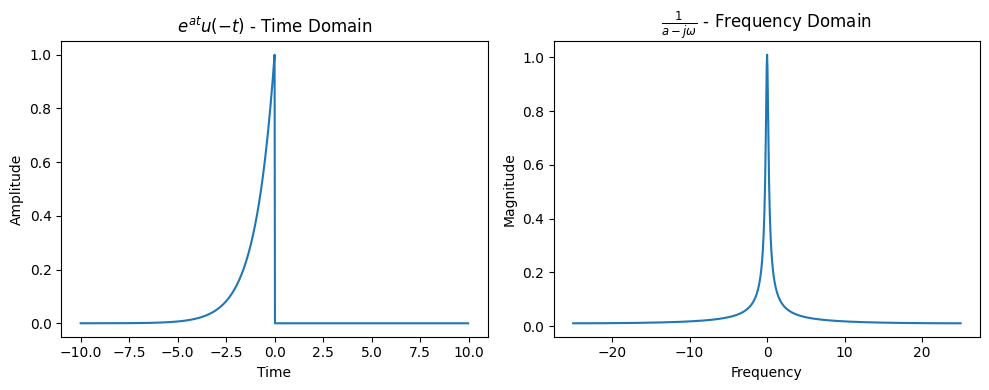

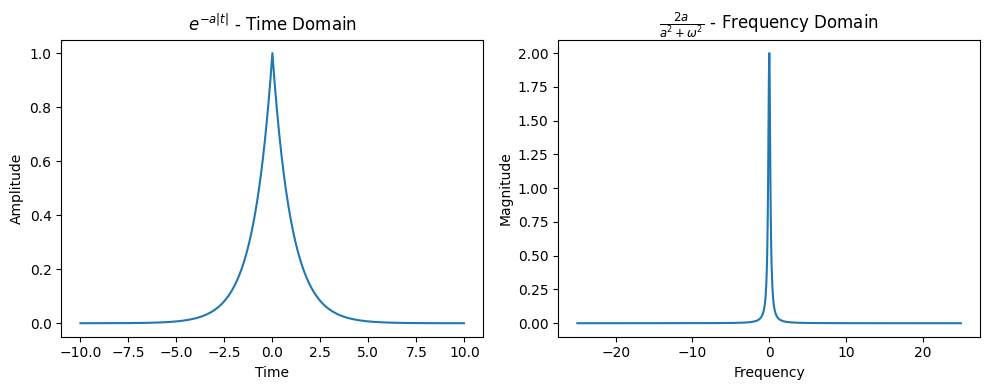

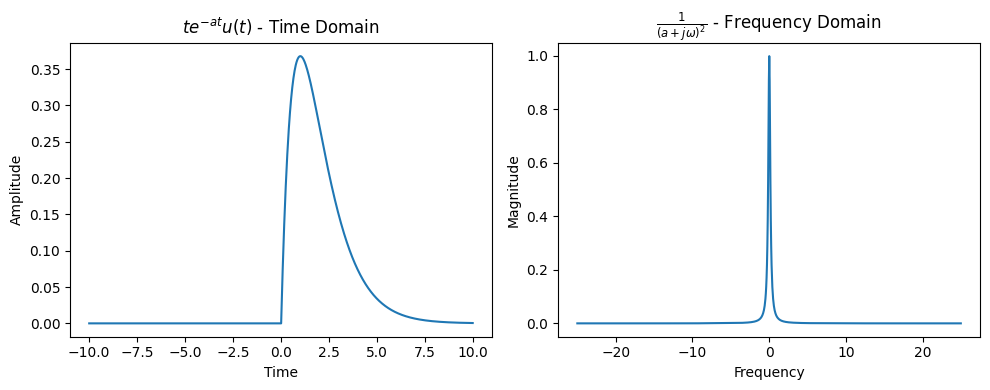

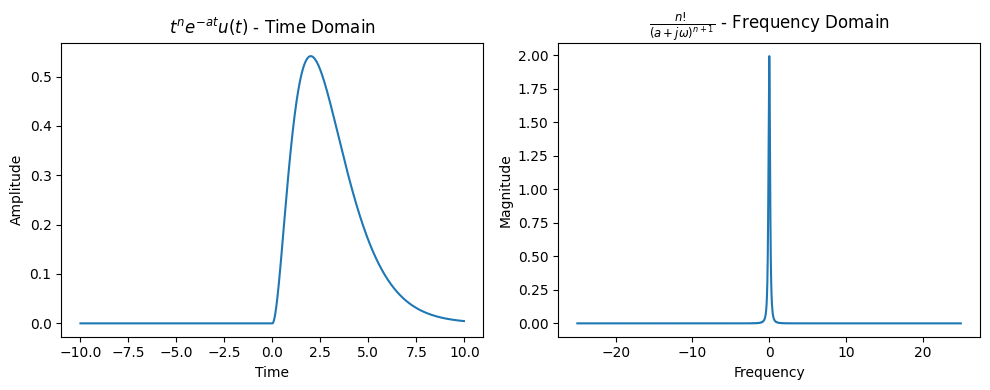

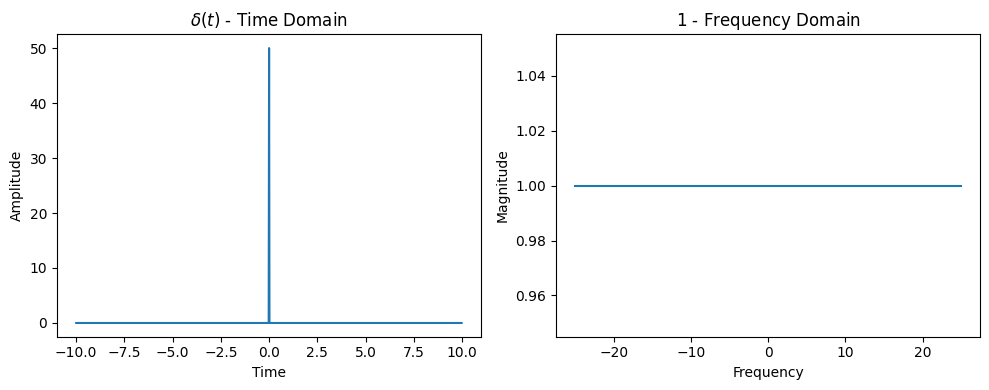

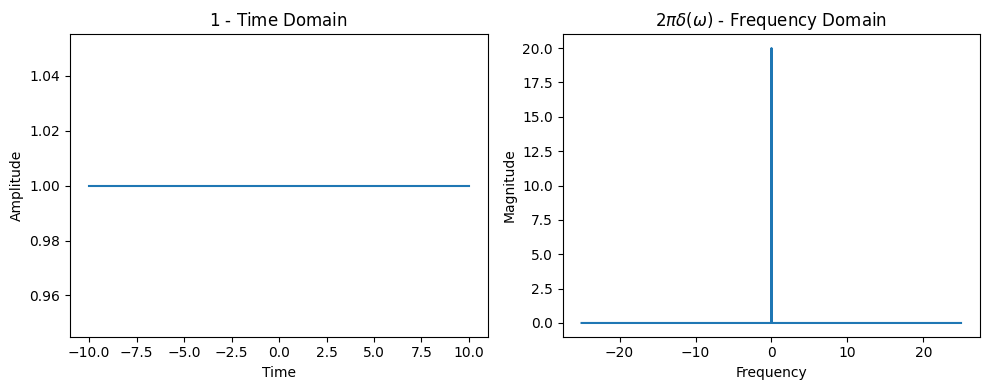

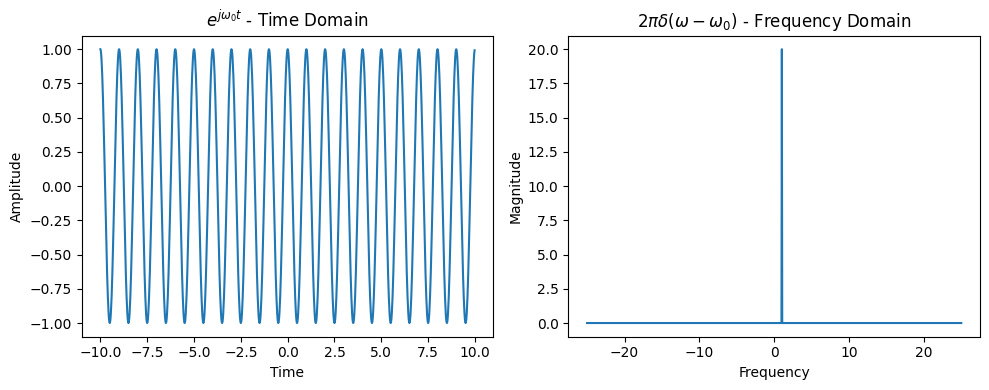

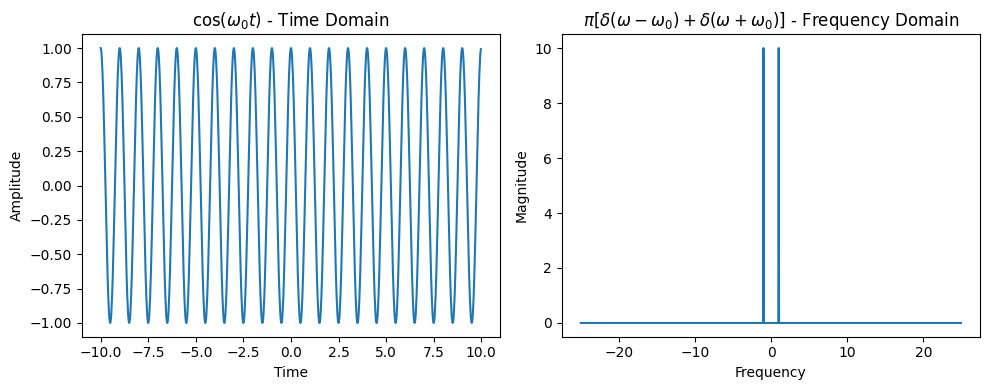

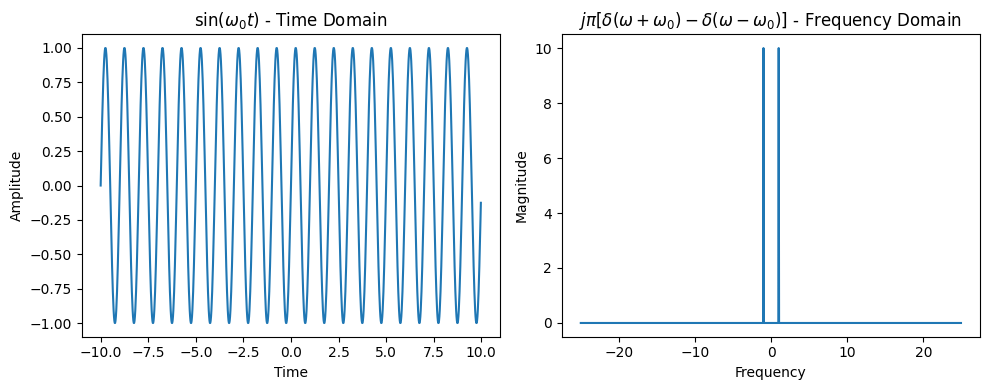

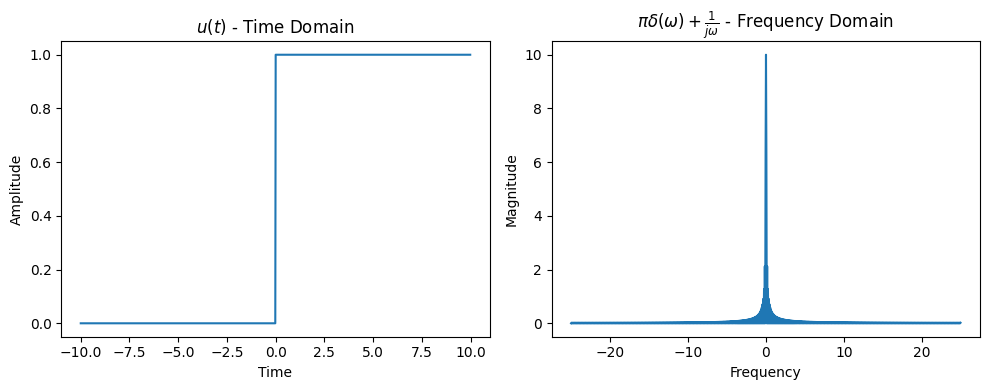

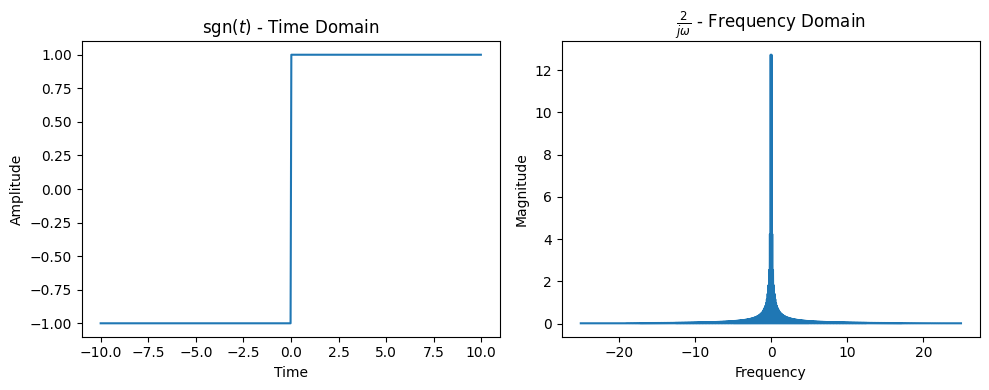

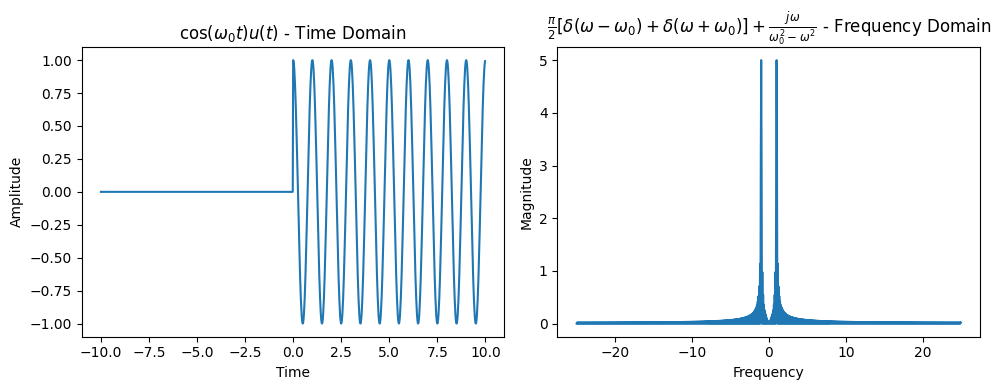

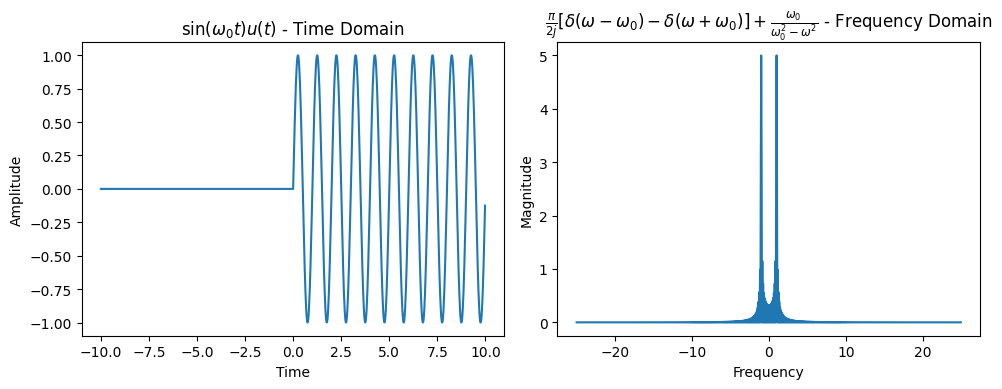

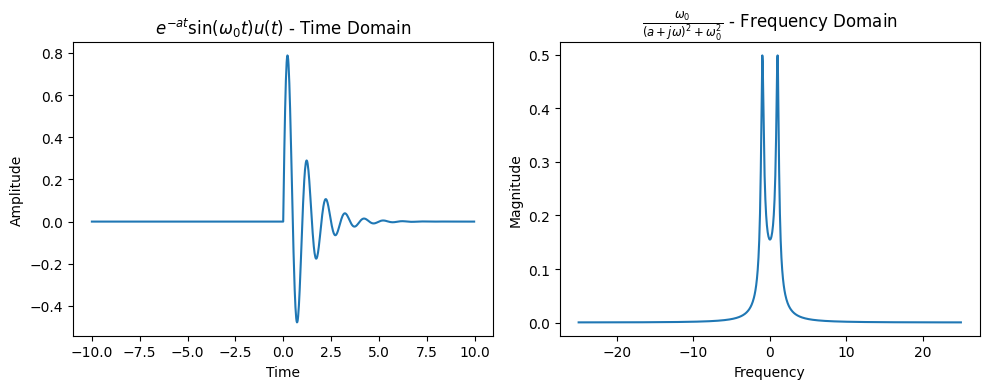

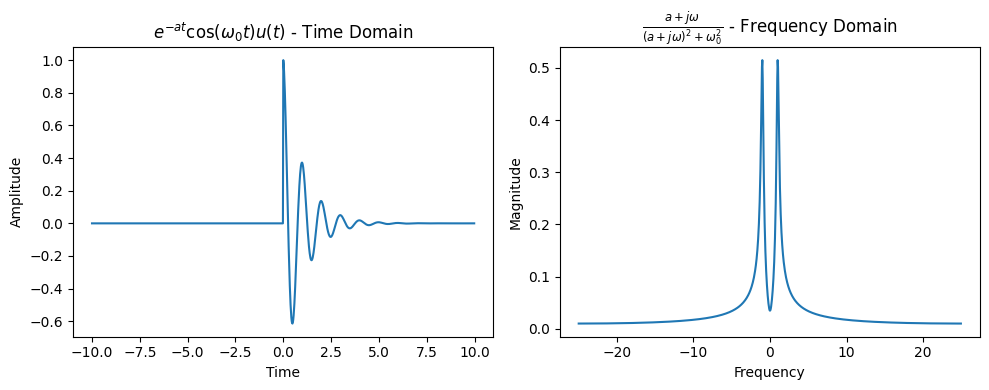

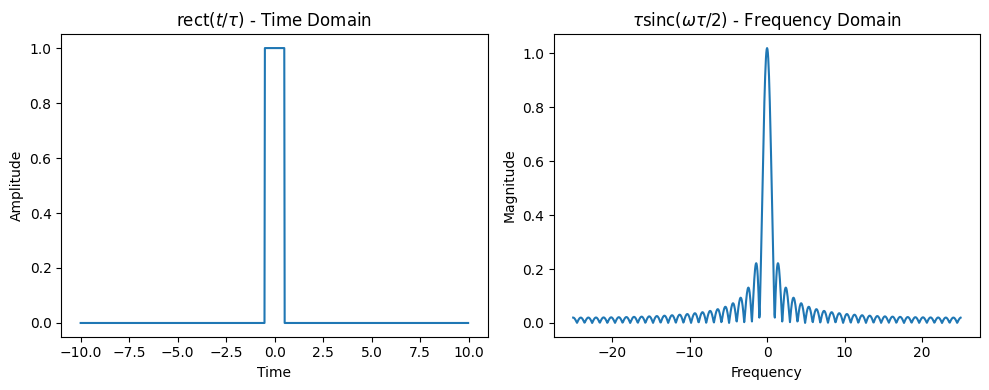

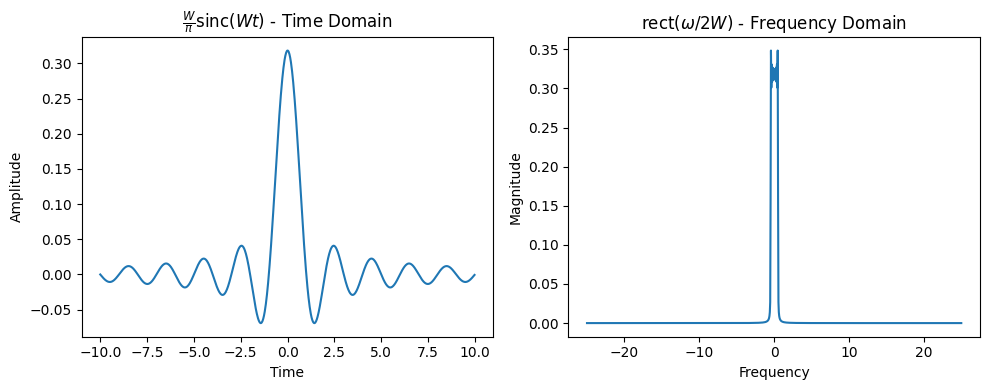

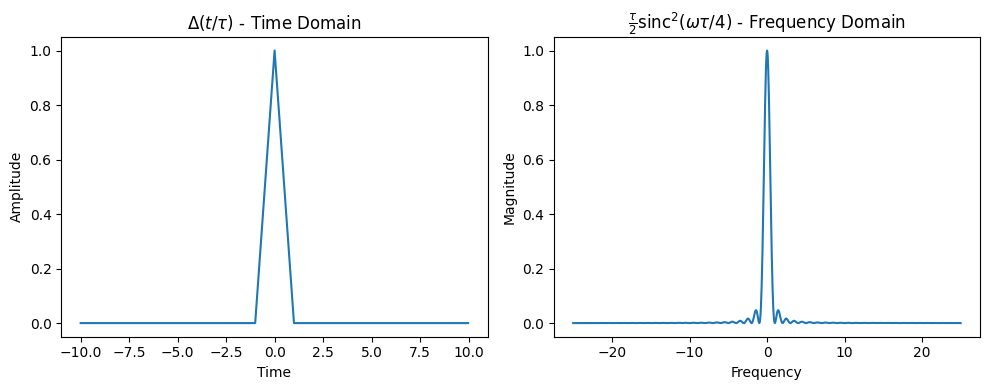

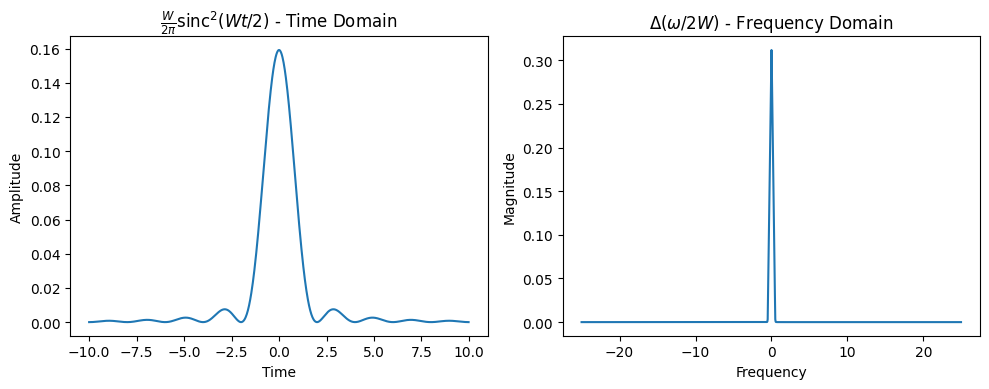

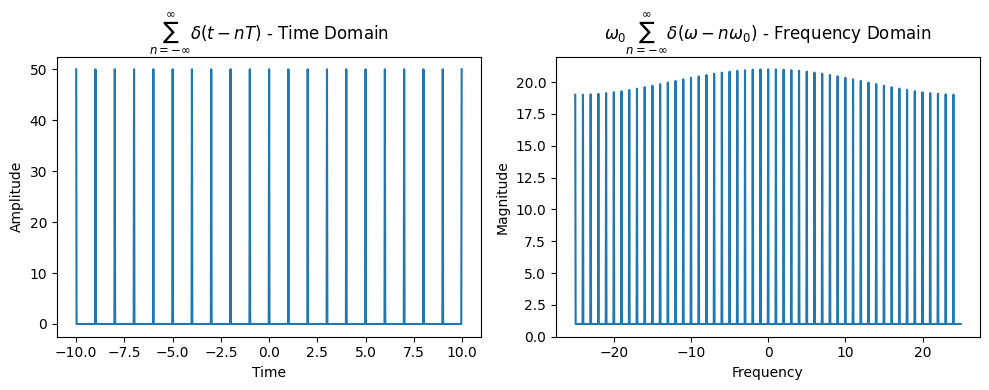

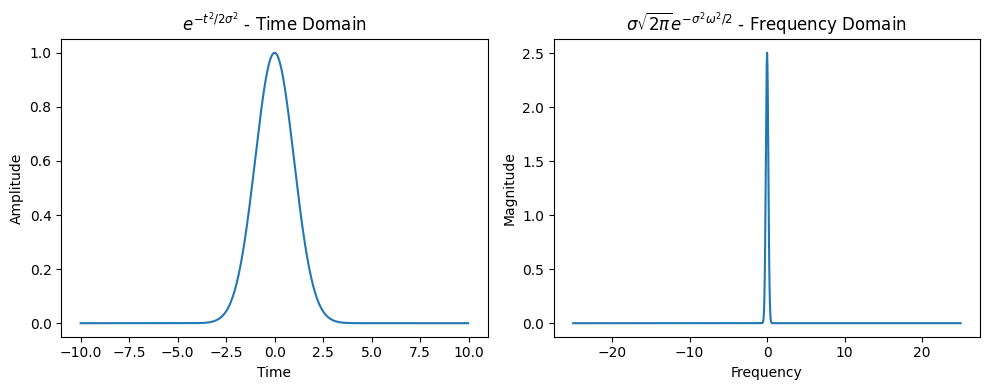

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_fourier_pair(t, y, time_domain, freq_domain):
    dt = t[1] - t[0]
    N = len(t)
    
    # Compute the FFT
    fft = np.fft.fft(y) * dt  # Scale by dt for correct magnitudes
    freqs = np.fft.fftfreq(N, dt)
    
    # Shift the FFT for better visualization
    fft_shifted = np.fft.fftshift(fft)
    freqs_shifted = np.fft.fftshift(freqs)

    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    ax1.plot(t, y.real)
    ax1.set_title(f'${time_domain}$ - Time Domain')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')

    ax2.plot(freqs_shifted, np.abs(fft_shifted))
    ax2.set_title(f'${freq_domain}$ - Frequency Domain')
    ax2.set_xlabel('Frequency')
    ax2.set_ylabel('Magnitude')
    
    plt.tight_layout()
    plt.show()

# Time array
t = np.linspace(-10, 10, 1000, endpoint=False)
dt = t[1] - t[0]

# Constants
a = 1
w0 = 2 * np.pi
W = 1
tau = 1
T = 1
sigma = 1

# 1. e^(-at)u(t)
y1 = np.exp(-a * t) * (t >= 0)
plot_fourier_pair(t, y1, r"e^{-at}u(t)", r"\frac{1}{a + j\omega}")

# 2. e^(at)u(-t)
y2 = np.exp(a * t) * (t <= 0)
plot_fourier_pair(t, y2, r"e^{at}u(-t)", r"\frac{1}{a - j\omega}")

# 3. e^(-a|t|)
y3 = np.exp(-a * np.abs(t))
plot_fourier_pair(t, y3, r"e^{-a|t|}", r"\frac{2a}{a^2 + \omega^2}")

# 4. te^(-at)u(t)
y4 = t * np.exp(-a * t) * (t >= 0)
plot_fourier_pair(t, y4, r"te^{-at}u(t)", r"\frac{1}{(a + j\omega)^2}")

# 5. t^ne^(-at)u(t) (n=2 for example)
n = 2
y5 = (t**n) * np.exp(-a * t) * (t >= 0)
plot_fourier_pair(t, y5, r"t^ne^{-at}u(t)", r"\frac{n!}{(a + j\omega)^{n+1}}")

# 6. δ(t)
y6 = np.zeros_like(t)
y6[len(t)//2] = 1/dt  # Approximation of delta function
plot_fourier_pair(t, y6, r"\delta(t)", r"1")

# 7. 1 (constant function)
y7 = np.ones_like(t)
plot_fourier_pair(t, y7, r"1", r"2\pi\delta(\omega)")

# 8. e^(jw0t)
y8 = np.exp(1j * w0 * t)
plot_fourier_pair(t, y8, r"e^{j\omega_0t}", r"2\pi\delta(\omega - \omega_0)")

# 9. cos(w0t)
y9 = np.cos(w0 * t)
plot_fourier_pair(t, y9, r"\cos(\omega_0t)", r"\pi[\delta(\omega - \omega_0) + \delta(\omega + \omega_0)]")

# 10. sin(w0t)
y10 = np.sin(w0 * t)
plot_fourier_pair(t, y10, r"\sin(\omega_0t)", r"j\pi[\delta(\omega + \omega_0) - \delta(\omega - \omega_0)]")

# 11. u(t)
y11 = np.heaviside(t, 1)
plot_fourier_pair(t, y11, r"u(t)", r"\pi\delta(\omega) + \frac{1}{j\omega}")

# 12. sgn(t)
y12 = np.sign(t)
plot_fourier_pair(t, y12, r"\text{sgn}(t)", r"\frac{2}{j\omega}")

# 13. cos(w0t)u(t)
y13 = np.cos(w0 * t) * (t >= 0)
plot_fourier_pair(t, y13, r"\cos(\omega_0t)u(t)", r"\frac{\pi}{2}[\delta(\omega - \omega_0) + \delta(\omega + \omega_0)] + \frac{j\omega}{\omega_0^2 - \omega^2}")

# 14. sin(w0t)u(t)
y14 = np.sin(w0 * t) * (t >= 0)
plot_fourier_pair(t, y14, r"\sin(\omega_0t)u(t)", r"\frac{\pi}{2j}[\delta(\omega - \omega_0) - \delta(\omega + \omega_0)] + \frac{\omega_0}{\omega_0^2 - \omega^2}")

# 15. e^(-at)sin(w0t)u(t)
y15 = np.exp(-a * t) * np.sin(w0 * t) * (t >= 0)
plot_fourier_pair(t, y15, r"e^{-at}\sin(\omega_0t)u(t)", r"\frac{\omega_0}{(a+j\omega)^2 + \omega_0^2}")

# 16. e^(-at)cos(w0t)u(t)
y16 = np.exp(-a * t) * np.cos(w0 * t) * (t >= 0)
plot_fourier_pair(t, y16, r"e^{-at}\cos(\omega_0t)u(t)", r"\frac{a+j\omega}{(a+j\omega)^2 + \omega_0^2}")

# 17. rect(t/τ)
y17 = np.where(np.abs(t) <= tau/2, 1, 0)
plot_fourier_pair(t, y17, r"\text{rect}(t/\tau)", r"\tau\text{sinc}(\omega\tau/2)")

# 18. (W/π)sinc(Wt)
y18 = (W/np.pi) * np.sinc(W * t)
plot_fourier_pair(t, y18, r"\frac{W}{\pi}\text{sinc}(Wt)", r"\text{rect}(\omega/2W)")

# 19. Δ(t/τ)
y19 = np.where(np.abs(t) <= tau, 1 - np.abs(t)/tau, 0)
plot_fourier_pair(t, y19, r"\Delta(t/\tau)", r"\frac{\tau}{2}\text{sinc}^2(\omega\tau/4)")

# 20. (W/2π)sinc^2(Wt/2)
y20 = (W/(2*np.pi)) * (np.sinc(W * t / 2))**2
plot_fourier_pair(t, y20, r"\frac{W}{2\pi}\text{sinc}^2(Wt/2)", r"\Delta(\omega/2W)")

# 21. Sum of delta functions
def delta_sum(t, T, num_pulses=10):
    y = np.zeros_like(t)
    for n in range(-num_pulses, num_pulses + 1):
        idx = np.argmin(np.abs(t - n*T))
        y[idx] = 1/dt
    return y

y21 = delta_sum(t, T)
plot_fourier_pair(t, y21, r"\sum_{n=-\infty}^{\infty} \delta(t - nT)", r"\omega_0 \sum_{n=-\infty}^{\infty} \delta(\omega - n\omega_0)")

# 22. Gaussian function
y22 = np.exp(-t**2 / (2*sigma**2))
plot_fourier_pair(t, y22, r"e^{-t^2/2\sigma^2}", r"\sigma\sqrt{2\pi}e^{-\sigma^2\omega^2/2}")